In [24]:
import pandas as pd
import os
from utils import show_df
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
import ftfy
import pickle
%matplotlib inline

os.chdir('D:\Project\Twitter_depression_detector\data\labelled_corpus')
os.getcwd()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'D:\\Project\\Twitter_depression_detector\\data\\labelled_corpus'

In [25]:
# Reads the json generated from the CLI commands above and creates a pandas dataframe
negative_df = pd.read_csv('Depression_merged_v1.tsv',sep='\t')
positive_df=pd.read_csv('positive_tweets.csv')

In [27]:
negative_df.head()
positive_df.head()

,renderedContent,mentionedUserCount
0,@miaakoch good luck in the concert,1
1,will play JL. Be right back.,0
2,@chr15t14n thanks.,1
3,@bekasaur thank you so much!!! nice to meet you!,1
4,@RickGershman Totally relate - my mom's a lone...,1


# label the dataset

In [28]:
negative_df['label']=1
positive_df['label']=0

In [29]:
negative_df=negative_df.sample(frac=1)

In [30]:
positive_df=positive_df.sample(frac=1)

# Create samples with different ratios

In [31]:
#negative_df
negative_df=negative_df.drop(['Depressive'],axis=1)

In [32]:
#get test samples
positive_test_sample=positive_df.iloc[40000:50000][:]
negative_test_sample=negative_df.iloc[40000:50000][:]


#1:1
positive_sample_1=positive_df.iloc[0:2487][:]
negative_sample_1=negative_df.iloc[:][:]
sample_1=pd.concat([positive_sample_1,negative_sample_1])

# #2:1
# positive_sample_2=positive_df.iloc[0:26667][:]
# negative_sample_2=negative_df.iloc[0:13333][:]
# sample_2=pd.concat([positive_sample_2,negative_sample_2])

# #1:2
# positive_sample_3=positive_df.iloc[0:26667][:]
# negative_sample_3=negative_df.iloc[0:13333][:]
# sample_3=pd.concat([positive_sample_3,negative_sample_3])


In [33]:
sample_1

,renderedContent,mentionedUserCount,label
125,Just hung up time to sleep now? Well... a lit...,0.0,0
8772,@YeahMandine hey!!! Follow me please!!!Thanks!!,1.0,0
26867,@ptownjake good to know I'll have to get some ...,1.0,0
47726,@ddlovato http://twitpic.com/4foca - You're so...,1.0,0
31839,@jacqueline47 as long as you're not going to m...,1.0,0
...,...,...,...
531,I can’t stop eating gummy bears.😅,NaN,1
719,Am I fat because I eat?\nOr do I eat because I...,NaN,1
2124,finna skip class,NaN,1
374,So kind of thinking of just tweeting away ever...,NaN,1


# wordcloud analysis 

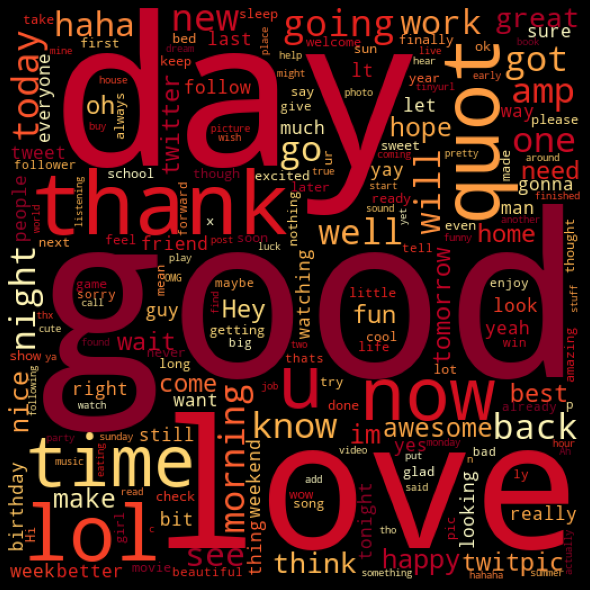

In [34]:

positive_words = ' '.join(list(sample_1[sample_1['label'] == 0]['renderedContent']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="YlOrRd").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

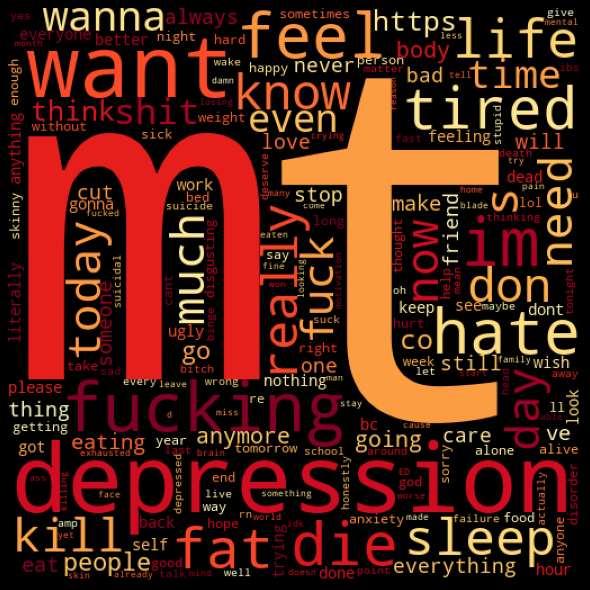

In [35]:

negative_words = ' '.join(list(sample_1[sample_1['label'] == 1]['renderedContent']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="YlOrRd").generate(negative_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

# See the length of the tweet

In [36]:
sample_1['len']=[len(x) for x in sample_1['renderedContent']]
sample_1.head()


,renderedContent,mentionedUserCount,label,len
125,Just hung up time to sleep now? Well... a lit...,0.0,0,67
8772,@YeahMandine hey!!! Follow me please!!!Thanks!!,1.0,0,48
26867,@ptownjake good to know I'll have to get some ...,1.0,0,66
47726,@ddlovato http://twitpic.com/4foca - You're so...,1.0,0,70
31839,@jacqueline47 as long as you're not going to m...,1.0,0,115


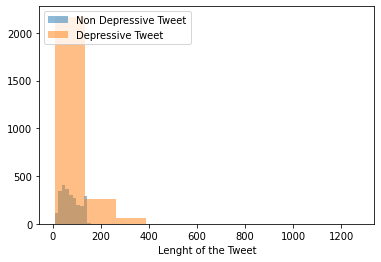

<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt



plt.xlabel('Lenght of the Tweet')
plt.hist(sample_1[sample_1['label'] == 0]['len'], alpha = 0.5, label='Non Depressive Tweet')
plt.hist(sample_1[sample_1['label'] == 1]['len'], alpha = 0.5, label='Depressive Tweet')
plt.legend(loc='upper left')
plt.show()

plt.savefig('len_sample_1')

In [38]:
# Expand Contraction
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

# Good Preprocessor: Links, twitter handle etc

In [39]:
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.RESERVED)

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # if url links then dont append to avoid news articles
        # also check tweet length, save those > 10 (length of word "depression")
        tweet=p.clean(tweet)
        if re.match("(\w+:\/\/\S+)", tweet) == None:
            #remove hashtag, @mention, emoji and image URLs
#             tweet = re.sub('[^A-Za-z0-9]+', '', tweet)
            
            #fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)
            
            #expand contraction
            tweet = expandContractions(tweet)

            #remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            #stop words
            stop_words = set(stopwords.words('english'))
            stop_words.remove('not')
            stop_words.remove('down')
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            #stemming words
            tweet = PorterStemmer().stem(tweet)
            
            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [40]:
tweets_list = [x for x in sample_1['renderedContent']]
# random_tweets_arr = [x for x in random_tweets_df['SentimentText']]
corpus= clean_tweets(tweets_list)
# X_r = clean_tweets(random_tweets_arr)

In [41]:
print(len(corpus))
print(len(tweets_list))

4974
4974


# create tf-idf

In [42]:

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(
                    ngram_range = (1,6),
                    sublinear_tf = True,
                    max_features = 15000)

X = tv.fit_transform(corpus).toarray()
y = sample_1.iloc[:, -2].values

pickle.dump(tv, open(r'D:\Project\Twitter_depression_detector\src\tv.pkl','wb'))


In [43]:
X.shape

(4974, 15000)

# Splitting Dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [45]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([247, 251], dtype=int64))

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)


GaussianNB()

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]

# save the model as a pickle file

In [48]:
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(classifier, open('D:\Project\Twitter_depression_detector\src\model.pkl','wb'))

# Create the confusion Metrics

<div>
<img src="confusion-matrix.png" width="500"/>
</div>                                                   

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("     CM   ")
print(cm)

print('Accuracy: {} \nPrecision: {} \nRecall: {}\nF1 score: {}'.format(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred), 
                  
                                                                       +recall_score(y_test, y_pred),
                                                           f1_score(y_test, y_pred)))


     CM   
[[216  31]
 [ 44 207]]
Accuracy: 0.8493975903614458 
Precision: 0.8697478991596639 
Recall: 0.8247011952191236
F1 score: 0.8466257668711656


In [50]:
text=["Lately I have been feeling unsure of myself as a person & an artist"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['lately i feeling unsure person artist']


array([1], dtype=int64)

In [61]:
# I am officially done with @kanyewest
#text=["Extreme sadness, lack of energy, hopelessness"]

# text=["I am officially done with @kanyewest"]
text=["Feeling down ..."]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['feeling down']


array([0], dtype=int64)

In [52]:
text=[" Okay here comes the truth, Im depressed"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['okay comes truth im depress']


array([1], dtype=int64)

In [53]:
text=[" what's the purpose of this sad life"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['purpose sad lif']


array([0], dtype=int64)

In [54]:
text=[" my daily routine is very simple.  i wake up and immediately want to stop existing"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['daily routine simple wake immediately want stop exist']


array([1], dtype=int64)

In [55]:
text=[" my depression and anxiety after another successful panic attack:"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)    
    

['depression anxiety another successful panic attack']


array([1], dtype=int64)

In [56]:
text=[" life doesnt make sense anymore"]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)

['life doesnt make sense anymor']


array([1], dtype=int64)

In [57]:
text=[" I will kill myself "]
print(clean_tweets(text))
test_array= tv.transform(clean_tweets(text)).toarray()
classifier.predict(test_array)    

['i kil']


array([0], dtype=int64)

# Code to see the False Negative

In [58]:
for i in range(len(y_pred)):
    if y_test[i]==1:
        if y_pred[i]!=y_test[i]:
            a=tv.inverse_transform(X_test[i])
            b=a[0].tolist()
            print(i,":",' '.join(b),':',y_test[i])


3 : cream get guess hour ice ice cream refuse refuse get refuse get get refuse get get guess refuse get get guess ice refuse get get guess ice cream think tomorrow : 1
7 : bathroom close cut going like like not not : 1
12 : hat : 1
27 : cool cool happy enough friend fuckin happy person person friend wish : 1
53 : bleed broke cut didnt lol make old old ones old ones make old ones make bleed old ones make bleed one old ones make bleed one broke one one broke one broke oozed one broke oozed lol ones ones make ones make bleed ones make bleed one ones make bleed one broke ones make bleed one broke oozed oozed oozed lol pick pick scabs pick scabs old pick scabs old ones pick scabs old ones make pick scabs old ones make bleed scabs scabs old scabs old ones scabs old ones make scabs old ones make bleed scabs old ones make bleed one : 1
54 : another bad eating end ever one one week one week another one week another bad one week another bad eating one week another bad eating ever week : 1
64 : c

# Code to see the False Postive

In [59]:
for i in range(len(y_pred)):
    if y_test[i]==0:
        if y_pred[i]!=y_test[i]:
            a=tv.inverse_transform(X_test[i])
            b=a[0].tolist()
            print(i,":",' '.join(b),':',y_test[i])


30 : damn damn look knowing look nic rippin rippin time rippin time nic time : 0
31 : buy cat food giant go sense that watching : 0
62 : better drink much much better sleep sleep much : 0
63 : noth : 0
70 : coffee degrees does drink every every tim involve makes makes perfect milk perfect perfect coffee perfect coffee drink perfect coffee drink every perfect coffee drink every tim scalding scalding soy scalding soy milk scalding soy milk 135 scalding soy milk 135 degrees scalding soy milk 135 degrees think think tim : 0
79 : al amazing can complain feel feel good feels fuckin good is life mood mood today one one fuckin one fuckin amazing one fuckin amazing mood one fuckin amazing mood today one fuckin amazing mood today life today truly : 0
111 : city pentagon pentagon city pentagon city right pentagon city right that pentagon city right that training pentagon city right that training ground right right that right that training right that training ground that training work you : 0
135 